In [2]:
#IMPORTS 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mat
from cycler import cycler
from matplotlib import colors 
from numba import njit,prange 
from tqdm.notebook import tqdm
import os
from scipy.interpolate import interp1d 
#MATPLOTLIB PERSONAL CONFIG  
plt.rcParams["figure.figsize"] = (5,5) 
plt.rcParams["lines.linewidth"] = 1.0 
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["axes.grid"] = "True" 
plt.rcParams["grid.alpha"] = 0.0 
plt.rcParams["figure.dpi"] = 150
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = 14 
plt.rcParams['axes.spines.right'] = True 
plt.rcParams['axes.spines.top'] = True
plt.rcParams["grid.linestyle"] = "--" 
plt.rcParams["legend.frameon"] = False 
plt.rcParams["patch.facecolor"] ="white" 
plt.rcParams.update({'errorbar.capsize': 4}) 
plt.rcParams["savefig.bbox"] = 'tight'
#MATPLOTLIB IMSHOW COLORS 
#plt.rcParams["axes.prop_cycle"]= cycler('color',["#264653", "#2a9d8f","#e9c46a","#f4a261"])
#color = np.array(["#264653", "#2a9d8f","#e9c46a","#f4a261"]) 
#cmap1 = colors.LinearSegmentedColormap.from_list("mycmap", np.flip(color))
#plt.rcParams['image.cmap'] =  cmap1

mapa_teste = colors.LinearSegmentedColormap.from_list("mycmap", np.array(["red","blue","green","orange"]))

In [3]:
data = np.loadtxt("more_new_data.dat")

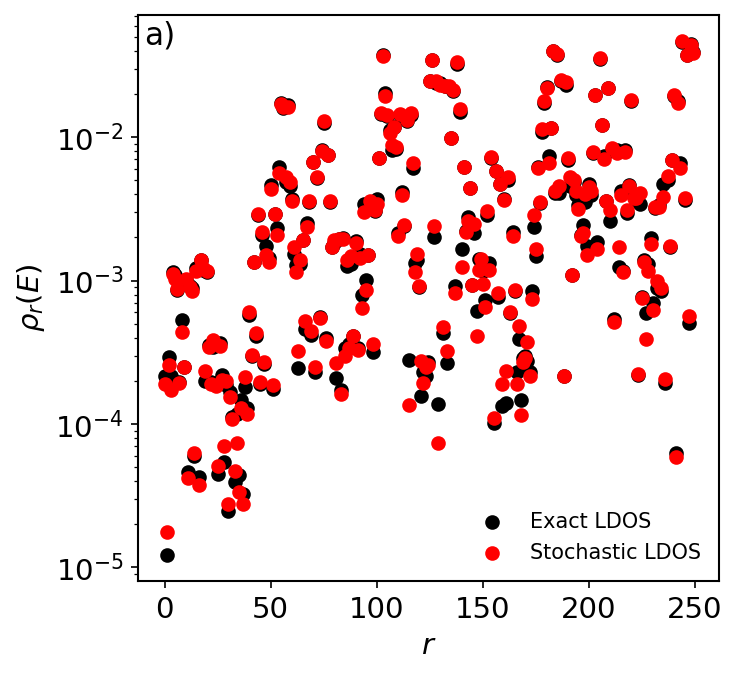

In [4]:
f, ax = plt.subplots()

plt.scatter(data[:, 0][0:250], data[:, 6][0:250], label="Exact LDOS", c="k")
plt.scatter(data[:, 0][0:250], data[:, 7][0:250], label="Stochastic LDOS", c="red")

plt.xlabel(r"$r$")
plt.ylabel(r"$\rho_{r}(E)$")
#plt.ylabel(r"$\Delta_{rel}^2$")

plt.yscale("log")

plt.legend(fontsize=10)
plt.text(.01, 0.99, 'a)', ha='left', va='top', fontsize=15, transform=ax.transAxes)
#plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/example_position_LDOS_L=250_M=500_r=10240.pdf", dpi=200)
plt.show()

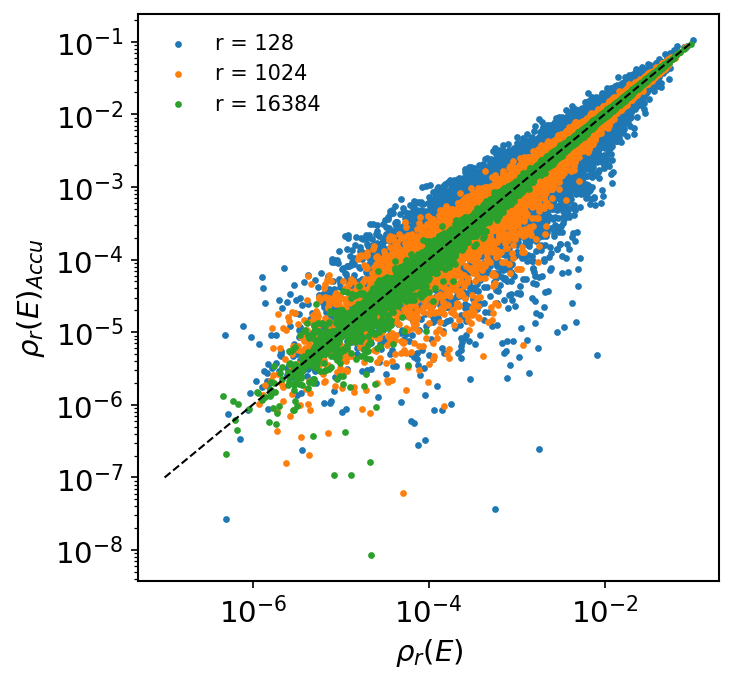

In [29]:
f, ax = plt.subplots()

plt.scatter(d128[:, 6], d128[:, 7], s=5, label="r = 128")
plt.scatter(d1024[:, 6], d1024[:, 7], s=5, label="r = 1024")
plt.scatter(d16384[:, 6], d16384[:, 7], s=5, label="r = 16384")
plt.plot(np.linspace(1e-7, 1e-1, 100), np.linspace(1e-7, 1e-1, 100), c="k", linestyle="--", lw = 1)

plt.xlabel(r"$\rho_{r}(E)$")
plt.ylabel(r"$\rho_{r}(E)_{Accu}$")
plt.yscale("log")
plt.xscale("log")

#plt.text(.01, 0.99, 'b)', ha='left', va='top', fontsize=15, transform=ax.transAxes)

#plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/example_LDOS_sigma_L=250_M=500_r=10240_trials=1000.pdf", dpi=200)
plt.legend(fontsize=10)
plt.show()

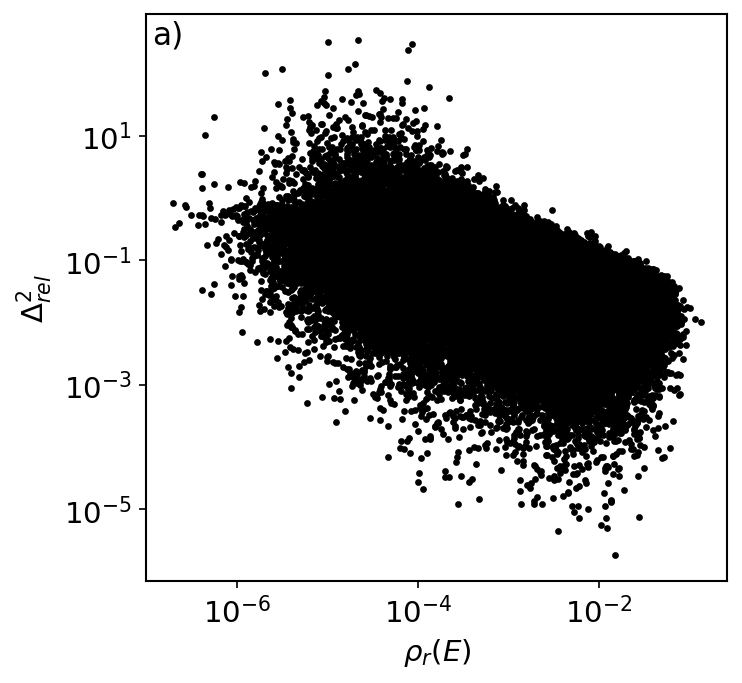

In [101]:
f, ax = plt.subplots()

plt.scatter(data[:, 6], np.abs(data[:, 10]), s = 5, c="k")
#plt.plot(np.sort(data[:, 6]), 1e-5/np.sort(data[:, 6]), c = "blue", linestyle = '--', linewidth=3)

plt.xlabel(r"$\rho_{r}(E)$")
plt.ylabel(r"$\Delta_{rel}^2$")

plt.yscale("log")
plt.xscale("log")

plt.text(.01, 0.99, 'a)', ha='left', va='top', fontsize=15, transform=ax.transAxes)
plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/_exaLDOS_rel_sigma_L=250_M=500_r=10240_trials=1000.pdf", dpi=200)

plt.show()

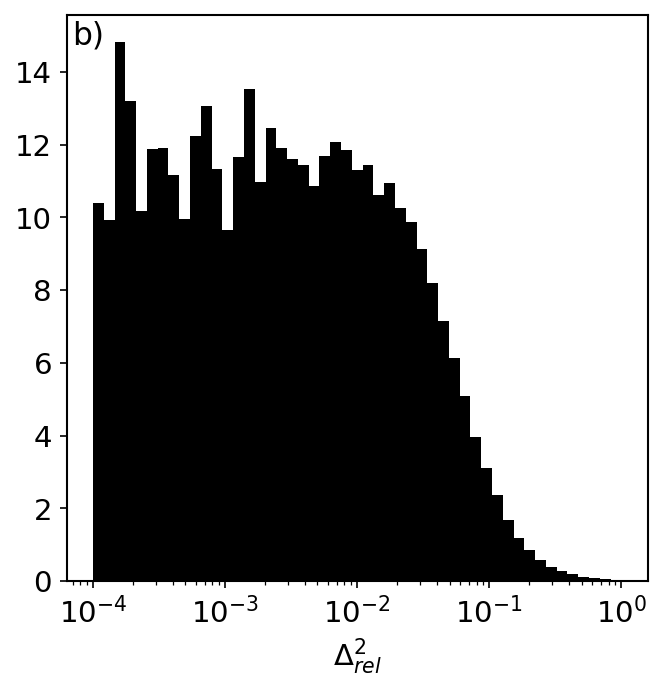

In [107]:
f, ax = plt.subplots()

plt.hist(data[:, 10], bins=10**np.linspace(-4,0,50), density=True, color="k")

#plt.xlabel(r"$\rho_{r}(E)$")
plt.xlabel(r"$\Delta_{rel}^2$")

#plt.yscale("log")
plt.xscale("log")

plt.text(.01, 0.99, 'b)', ha='left', va='top', fontsize=15, transform=ax.transAxes)
plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/histogram_rel_sigma_L=250_M=500_r=10240_trials=1000.pdf", dpi=200)


plt.show()

In [104]:
# variance

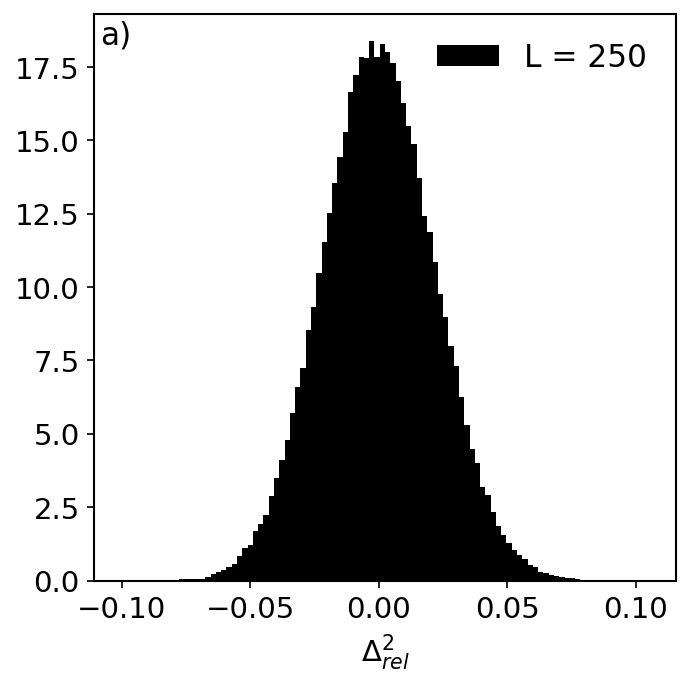

In [111]:
f, ax = plt.subplots()

plt.hist(data[:, 5], bins=100, density=True, color="k", label="L = 250")

#plt.xlabel(r"$\rho_{r}(E)$")
plt.xlabel(r"$\Delta_{rel}^2$")

#plt.yscale("log")
#plt.xscale("log")

plt.text(.01, 0.99, 'a)', ha='left', va='top', fontsize=15, transform=ax.transAxes)
plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/histogram_rel_variance_L=250_M=500_r=10240_trials=1000.pdf", dpi=200)

plt.legend()
plt.show()

In [113]:
from scipy.optimize import curve_fit

def gaussian(x, sigma, mu):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x - mu)**2/(sigma**2))

In [119]:
r128 = np.loadtxt("data_r=128.dat")[:, 5]
r256 = np.loadtxt("data_r=256.dat")[:, 5]
r512 = np.loadtxt("data_r=512.dat")[:, 5]
r1024 = np.loadtxt("data_r=1024.dat")[:, 5]
r2048 = np.loadtxt("data_r=2048.dat")[:, 5]
r4096 = np.loadtxt("data_r=4096.dat")[:, 5]
r8192 = np.loadtxt("data_r=8192.dat")[:, 5]
r16384 = np.loadtxt("data_r=16384.dat")[:, 5]

In [122]:
valores128, bins128 = np.histogram(r128, bins = 100, density = True)
valores256, bins256 = np.histogram(r256, bins = 100, density = True)
valores512, bins512 = np.histogram(r512, bins = 100, density = True)
valores1024, bins1024 = np.histogram(r1024, bins = 100, density = True)
valores2048, bins2048 = np.histogram(r2048, bins = 100, density = True)
valores4096, bins4096 = np.histogram(r4096, bins = 100, density = True)
valores8192, bins8192 = np.histogram(r8192, bins = 100, density = True)
valores16384, bins16384 = np.histogram(r16384, bins = 100, density = True)

In [123]:
def parameters(valores, bins):
    return curve_fit(gaussian, bins[0:-1] + (bins[1] - bins[0])/2, valores)

In [132]:
sigma_x = np.array([parameters(valores128, bins128)[0][0], parameters(valores256, bins256)[0][0], parameters(valores512, bins512)[0][0], \
parameters(valores1024, bins1024)[0][0], parameters(valores2048, bins2048)[0][0], parameters(valores4096, bins4096)[0][0], \
parameters(valores8192, bins8192)[0][0], parameters(valores16384, bins16384)[0][0]])

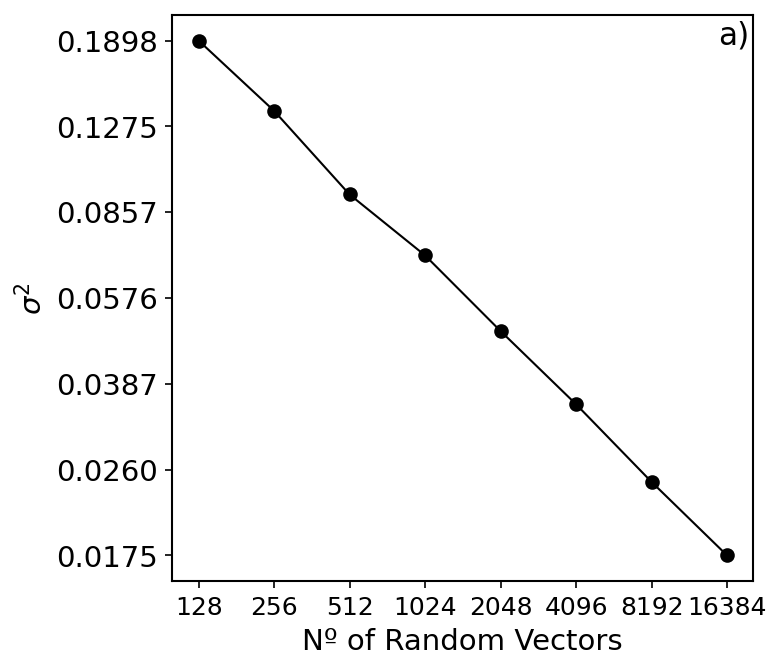

In [251]:
import matplotlib 

f, ax = plt.subplots(figsize=(5, 5))

plt.plot(2**np.arange(7, 15), sigma_x, "-o", c="k")

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xticks(2**np.arange(7, 15), fontsize=0.5)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_yticks(np.exp(np.linspace(np.log(min(sigma_x)), np.log(max(sigma_x)), 7)))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected        # ticks along the top edge are off
    labelsize=12)

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off       # ticks along the top edge are off
    labelbottom=False)

plt.text(.94, 0.99, 'a)', ha='left', va='top', fontsize=15, transform=ax.transAxes)

plt.xlabel("Nº of Random Vectors")
plt.ylabel(r"$\sigma^2$")
plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/central_limit_theorem_L=125.pdf", dpi=200)
plt.show()

In [27]:
d128 = np.loadtxt("data_r=128.dat")
d256 = np.loadtxt("data_r=256.dat")
d512 = np.loadtxt("data_r=512.dat")
d1024 = np.loadtxt("data_r=1024.dat")
d2048 = np.loadtxt("data_r=2048.dat")
d4096 = np.loadtxt("data_r=4096.dat")
d8192 = np.loadtxt("data_r=8192.dat")
d16384 = np.loadtxt("data_r=16384.dat")

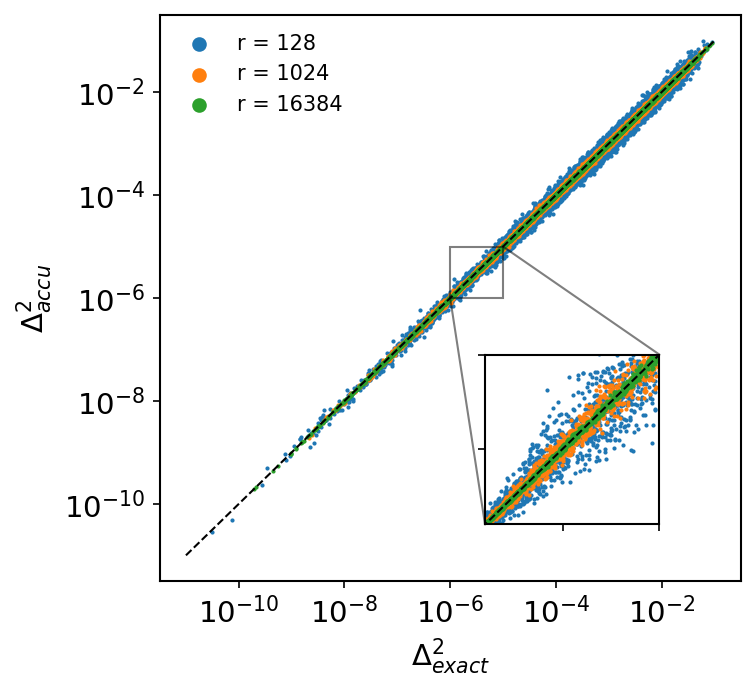

In [28]:
f, ax = plt.subplots(figsize=(5, 5))

plt.scatter(d128[:, 1]*np.sqrt(2*np.pi)*np.pi/250*125, d128[:, 2]*np.sqrt(2*np.pi)*np.pi/250*125, s = 1,label = "r = 128")
plt.scatter(d1024[:, 1]*np.sqrt(2*np.pi)*np.pi/250*125, d1024[:, 2]*np.sqrt(2*np.pi)*np.pi/250*125, s = 1, label = "r = 1024")
plt.scatter(d16384[:, 1]*np.sqrt(2*np.pi)*np.pi/250*125, d16384[:, 2]*np.sqrt(2*np.pi)*np.pi/250*125, s = 1, label = "r = 16384")
plt.plot(np.linspace(1e-11, 1e-1, 100), np.linspace(1e-11, 1e-1, 100), c="k", linestyle="--", lw = 1)

plt.xscale("log")
plt.yscale("log")

axins = ax.inset_axes([0.56, 0.1, 0.3, 0.3])
axins.scatter(d128[:, 1], d128[:, 2], s = 1)
axins.scatter(d1024[:, 1], d1024[:, 2], s = 1)
axins.scatter(d16384[:, 1], d16384[:, 2], s = 1)
axins.plot(np.linspace(1e-11, 1e-1, 100), np.linspace(1e-11, 1e-1, 100), c="k", linestyle="--", lw = 1)

x1, x2, y1, y2 = 1e-6, 1e-5, 1e-6, 1e-5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.spines['top'].set_visible(True)
axins.spines['right'].set_visible(True)
ax.indicate_inset_zoom(axins, edgecolor="black")

plt.xlabel(r"$\Delta^2_{exact}$")
plt.ylabel(r"$\Delta^2_{accu}$")

plt.legend(markerscale=6, fontsize = 10)

#plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/gucci_central_limit_theorem_L=125.pdf", dpi=200)
plt.show()

In [347]:
l125 = np.loadtxt("data_r_1024_L=125.dat")[:, 5]
l250 = np.loadtxt("data_r_1024_L=250.dat")[:, 5]
l500 = np.loadtxt("data_r_1024_L=500.dat")[:, 5]
l1000 = np.loadtxt("data_r_1024_L=1000.dat")[:, 5]
l2000 = np.loadtxt("data_r_1024_L=2000.dat")[:, 5]

In [348]:
valores125, bins125 = np.histogram(l125, bins = 100, density = True)
valores250, bins250 = np.histogram(l250, bins = 100, density = True)
valores500, bins500 = np.histogram(l500, bins = 100, density = True)
valores1000, bins1000 = np.histogram(l1000, bins = 100, density = True)
valores2000, bins2000 = np.histogram(l2000, bins = 100, density = True)

In [349]:
sigma_x_size = np.array([parameters(valores125, bins125)[0][0], parameters(valores250, bins250)[0][0], parameters(valores500, bins500)[0][0], \
parameters(valores1000, bins1000)[0][0], parameters(valores2000, bins2000)[0][0]])

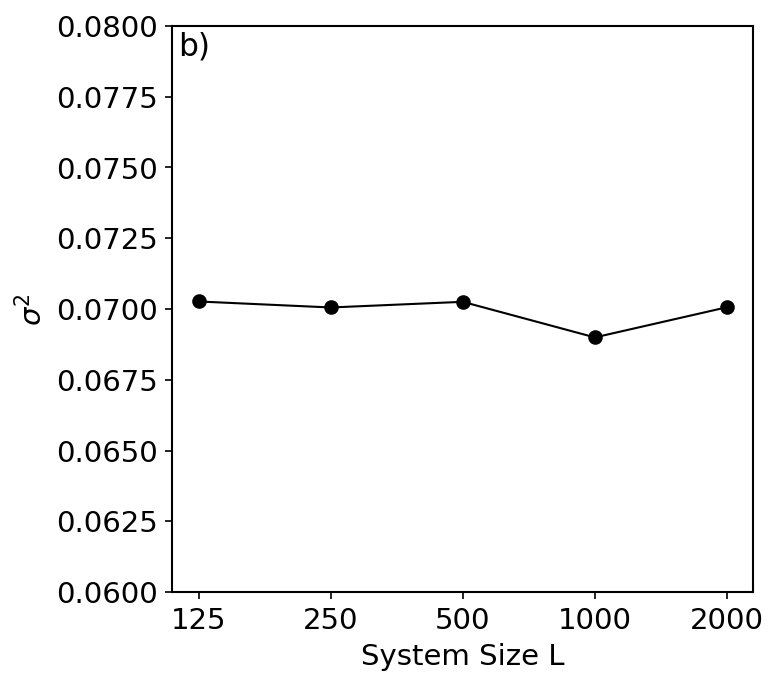

In [352]:
import matplotlib 

f, ax = plt.subplots(figsize=(5, 5))

plt.plot(np.array([125, 250, 500, 1000, 2000]), sigma_x_size, "-o", c="k")

#ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xticks(np.array([125, 250, 500, 1000, 2000]), fontsize=1)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#ax.set_yticks(np.exp(np.linspace(np.log(min(sigma_x_size)), np.log(max(sigma_x_size)), 7)))
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off       # ticks along the top edge are off
    labelbottom=False)

plt.ylim(0.06, 0.08)
plt.xlabel("System Size L")
plt.ylabel(r"$\sigma^2$")
plt.text(.01, 0.99, 'b)', ha='left', va='top', fontsize=15, transform=ax.transAxes)
#plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/sigma_with_size.pdf", dpi=200)
plt.show()

In [255]:
# self avering rho squared

In [380]:
# M = 250, dependence with size

ex125 = np.loadtxt("data_r_1024_L=125.dat")[:, 6]
ex250 = np.loadtxt("data_r_1024_L=250.dat")[:, 6]
ex500 = np.loadtxt("data_r_1024_L=500.dat")[:, 6]
ex1000 = np.loadtxt("data_r_1024_L=1000.dat")[:, 6]
ex2000 = np.loadtxt("data_r_1024_L=2000.dat")[:, 6]

In [381]:
rho_s_size = np.array([np.mean(np.sum(np.array_split(ex125**2, 100), axis=1)), np.mean(np.sum(np.array_split(ex250**2, 100), axis=1)), 
                       np.mean(np.sum(np.array_split(ex500**2, 100), axis=1)), np.mean(np.sum(np.array_split(ex1000**2, 50), axis=1)), 
                       np.mean(np.sum(np.array_split(ex2000**2, 50), axis=1))])

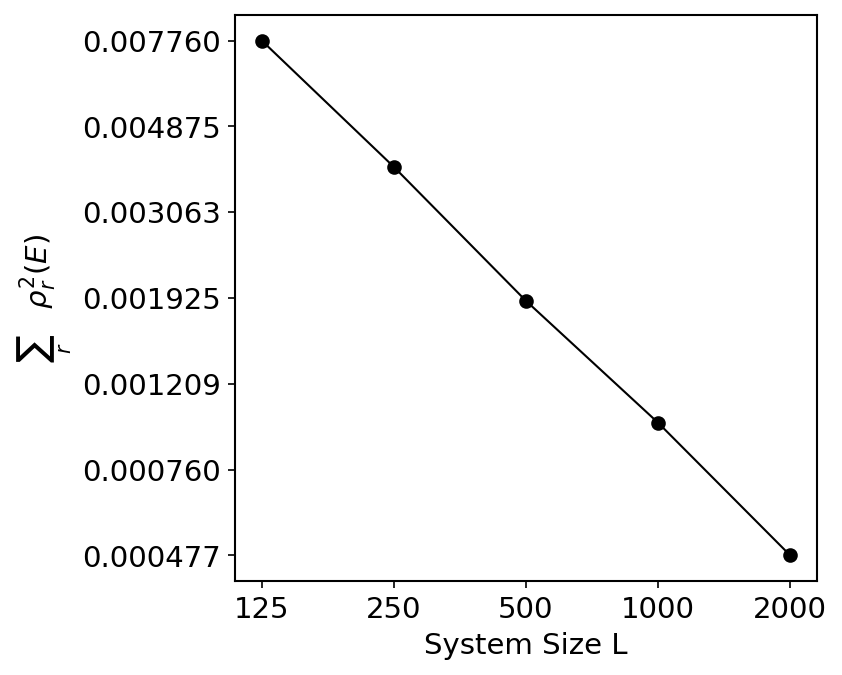

In [383]:
import matplotlib 

f, ax = plt.subplots(figsize=(5, 5))

plt.plot(np.array([125, 250, 500, 1000, 2000]), rho_s_size, "-o", c="k")
#plt.plot(np.array([125, 250, 500, 1000, 2000]), 1/np.array([125, 250, 500, 1000, 2000]), "-o", c="r")

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xticks(np.array([125, 250, 500, 1000, 2000]), fontsize=1)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_yticks(np.exp(np.linspace(np.log(min(rho_s_size)), np.log(max(rho_s_size)), 7)))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off       # ticks along the top edge are off
    labelbottom=False)

plt.xlabel("System Size L")
plt.ylabel(r"$\sum_{r} \quad \rho^2_{r}(E)$")
#plt.text(.94, 0.99, 'a)', ha='left', va='top', fontsize=15, transform=ax.transAxes)
#plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/rho_squared_sum_size.pdf", dpi=200)
plt.show()

In [371]:
# L = 250, dependence with moments, careful of same name variables

ex125 = np.loadtxt("data_r_1024_L=250_M=50.dat")[:, 6]
ex250 = np.loadtxt("data_r_1024_L=250_M=100.dat")[:, 6]
ex500 = np.loadtxt("data_r_1024_L=250_M=250.dat")[:, 6]
ex1000 = np.loadtxt("data_r_1024_L=250_M=500.dat")[:, 6]
ex2000 = np.loadtxt("data_r_1024_L=250_M=1000.dat")[:, 6]

In [372]:
rho_s_size = np.array([np.mean(np.sum(np.array_split(ex125**2, 100), axis=1)), np.mean(np.sum(np.array_split(ex250**2, 100), axis=1)), 
                       np.mean(np.sum(np.array_split(ex500**2, 100), axis=1)), np.mean(np.sum(np.array_split(ex1000**2, 100), axis=1)), 
                       np.mean(np.sum(np.array_split(ex2000**2, 100), axis=1))])

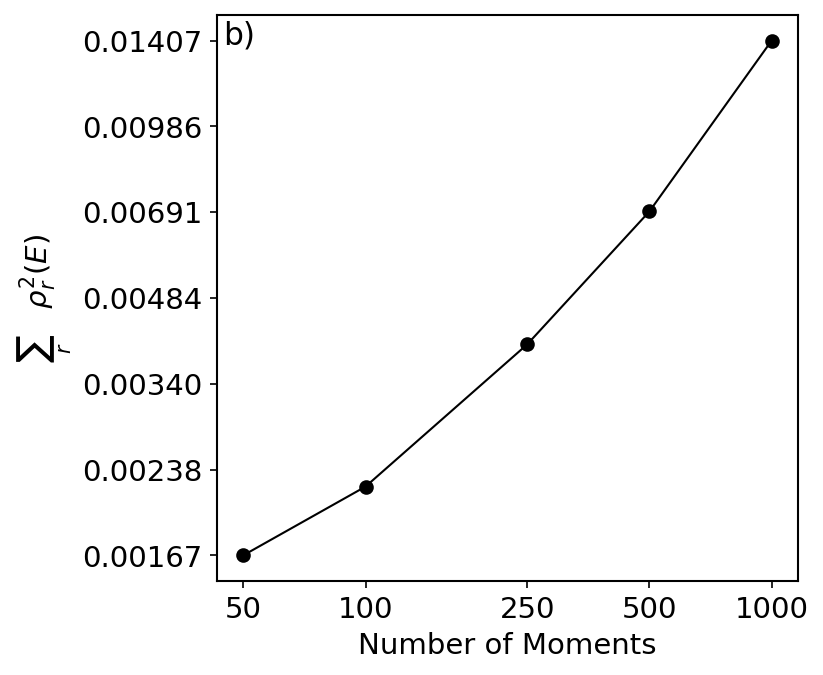

In [378]:
import matplotlib 

f, ax = plt.subplots(figsize=(5, 5))

plt.plot(np.array([50, 100, 250, 500, 1000]), rho_s_size, "-o", c="k")
#plt.plot(np.array([50, 100, 250, 500, 1000]), 10**-4.5*np.array([50, 100, 250, 500, 1000]), "-o", c="r")

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xticks(np.array([50, 100, 250, 500, 1000]), fontsize=1)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.set_yticks(np.exp(np.linspace(np.log(min(rho_s_size)), np.log(max(rho_s_size)), 7)))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off       # ticks along the top edge are off
    labelbottom=False)

plt.xlabel("Number of Moments")
plt.ylabel(r"$\sum_{r} \quad \rho^2_{r}(E)$")
plt.text(.01, 0.99, 'b)', ha='left', va='top', fontsize=15, transform=ax.transAxes)
#plt.savefig("/home/diogop/Documents/Thesis Folder/Contas Random LDOS/Images Thesis/rho_squared_sum_size_dependencemoments.pdf", dpi=200)
plt.show()

In [308]:
len(np.split(ex2000**2, 20)[0])

2000

In [314]:
np.std(np.sum(np.array_split(ex500**2, 100), axis=1))

0.0038047152606311245

In [294]:
np.sum(np.array_split(ex125**2, 100)[0:2], axis=1)

array([0.00525761, 0.00336633])

In [324]:
np.sum(ex1000[0:1000]**2)

0.008317422202095614

In [370]:
len(np.array_split(ex125**2, 100)[0])

250